The algorithm

In [162]:
def SOM(X, map_size, iterations, lr=0.1, recived_map=None , weights=None, start_iter=0):
    lr = lr
    n_radius = 0.6
    if recived_map is None:
        k_map = []
        for i in range(map_size):
            for j in range(map_size):
                  k_map.append([0.4*(i/map_size), (j/map_size)**2])
    else:
        k_map = recived_map

    for _iter in range(iterations+1):
        s_size = n_radius * (1 - _iter / iterations)
        if weights is None:
            point = random.choice(X)
        else:
            point = random.choices(X, weights=weights, k=1)[0]
            
        # Find the euclidian distance for all neurons
        dists = np.array([np.linalg.norm(point - neuron) for neuron in k_map])

        BMU = k_map[np.argmin(dists)]

        # Find the neighborhood by distance
        neighborhood = [i for i, c in enumerate(k_map) if sum(abs(p-q) for p,q in zip(BMU,c)) <= s_size]

        # Update
        for neighbor in neighborhood:
            new_x = (1 - lr) * k_map[neighbor][0] + lr * point[0]
            new_y = (1 - lr) * k_map[neighbor][1] + lr * point[1]
            k_map[neighbor] = (new_x, new_y)

        # Give each point a label
        y_values = [np.argmin([np.linalg.norm(point - neuron) for neuron in k_map]) for point in X]
        neurons = np.array(k_map)

        # Plot the points with the label
        unique_labels = list(set(y_values))
        labels = [unique_labels.index(label) for label in y_values]
        if _iter%10 == 0:
            plt.scatter(X[:, 0], X[:, 1], c=labels)
#                 plt.scatter(neurons[:, 0], neurons[:, 1],c=list(range(len(neurons**2))), marker = (5,2), s = 500)
            plt.scatter(neurons[:, 0], neurons[:, 1],c='b', marker = (5,2), s = 200)
            plt.title("After %d iterations" %(start_iter+_iter))
            plt.show()
    return k_map

Our dataset is 500 points {(x,y)|0 <= x,y <= 1} with uniform distrobution.

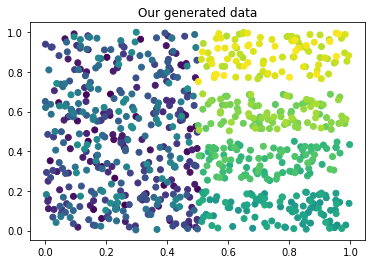

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import random
points = 400
# Create a dataset
finger_size = int(points/4)
base_hand_x, base_hand_y = np.random.uniform(0, 0.5, points), np.random.uniform(0, 1, points)
f_1_x, f_1_y = np.random.uniform(0.5, 1, finger_size), np.random.uniform(0, 0.2, finger_size)
f_2_x, f_2_y = np.random.uniform(0.5, 1, finger_size), np.random.uniform(0.25, 0.45, finger_size)
f_3_x, f_3_y = np.random.uniform(0.5, 1, finger_size), np.random.uniform(0.5, 0.7, finger_size)
f_4_x, f_4_y = np.random.uniform(0.5, 1, finger_size), np.random.uniform(0.75, 1, finger_size)

full_X = np.zeros((2*points, 2))
full_X[:points, 0], full_X[:points, 1] = base_hand_x, base_hand_y
full_X[points:finger_size+points, 0],full_X[points:finger_size+points, 1] = f_1_x, f_1_y
full_X[finger_size+points:2*finger_size+points, 0], full_X[finger_size+points:2*finger_size+points, 1] = f_2_x, f_2_y
full_X[2*finger_size+points:3*finger_size+points, 0], full_X[2*finger_size+points:3*finger_size+points, 1] = f_3_x, f_3_y
partial_X = np.copy(full_X)

full_X[3*finger_size+points:4*finger_size+points, 0], full_X[3*finger_size+points:4*finger_size+points, 1] = f_4_x, f_4_y

# plot dataset
plt.scatter(full_X[:, 0], full_X[:, 1], c=list(range(800)))
plt.title("Our generated data")
plt.show()

2000 Iterations, 15 neurons.

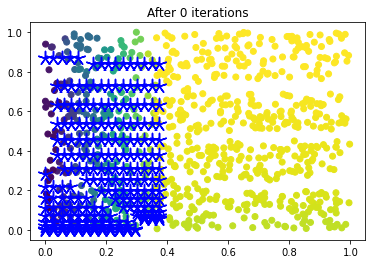

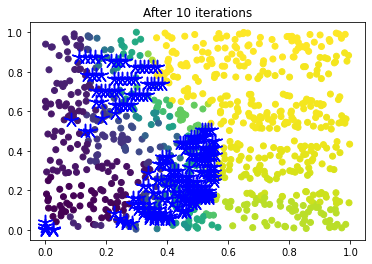

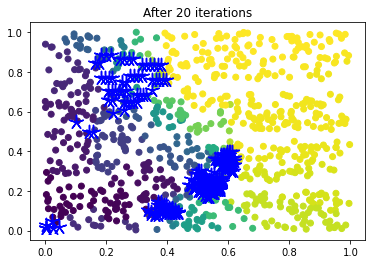

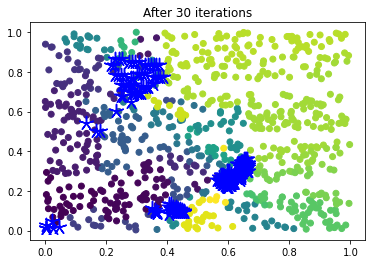

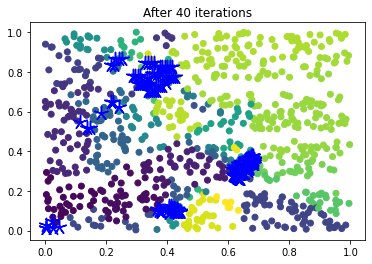

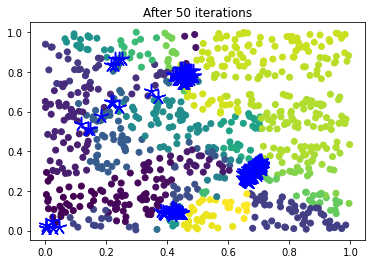

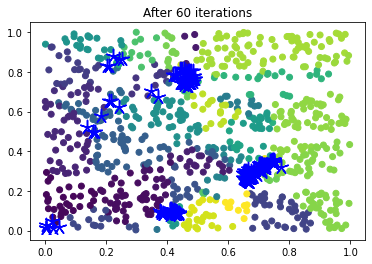

In [164]:
kmap = SOM(full_X,15,60)

The neurons go towards the right side of the image (to the fingers) with group of clusters.

Continue with only 3 fingers for another 60 iters

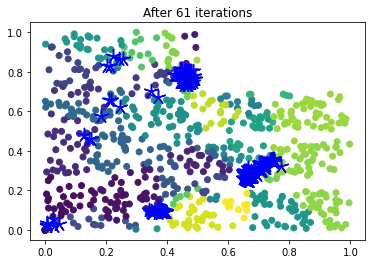

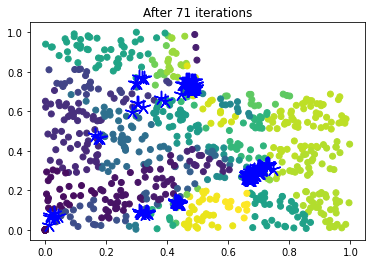

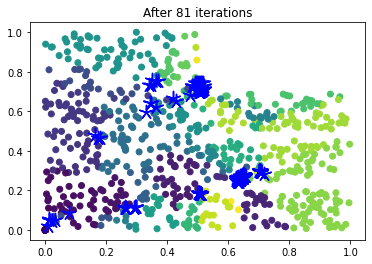

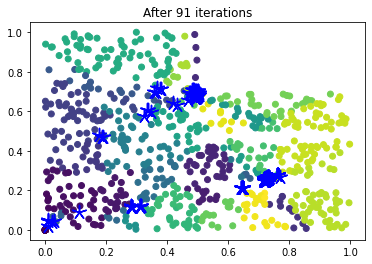

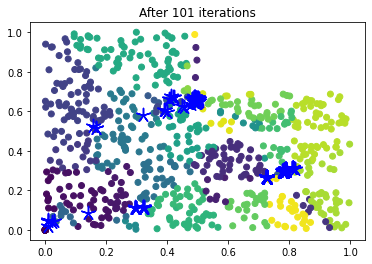

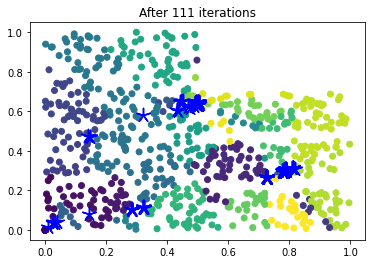

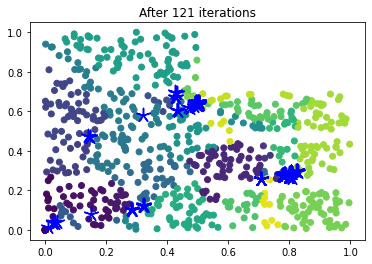

In [165]:
kmap = SOM(X=partial_X, map_size=15, iterations=60, recived_map=kmap, start_iter=61)

When removing the most upper finger, all neurons leaving the upper area and goind towards the x-axis.
We expected this kind of behaviour from the neurons, because they have more likelyhood to go towards the x-axis.

Same but taking from non-unifrom distribution:
Proportinal to the size of x and y.
We chose this distribution to see how it handles the missing finger.

In [166]:
weights=[x*y for x, y in full_X]
weights = weights/sum(weights)

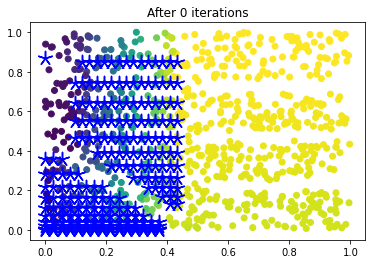

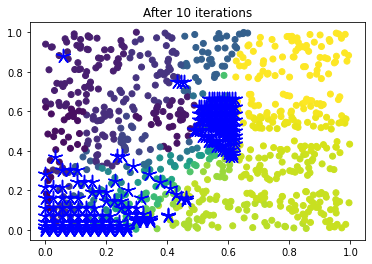

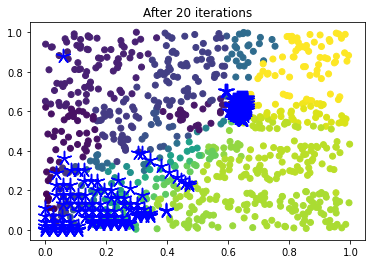

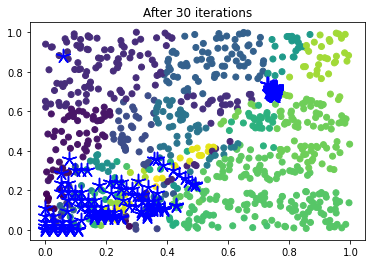

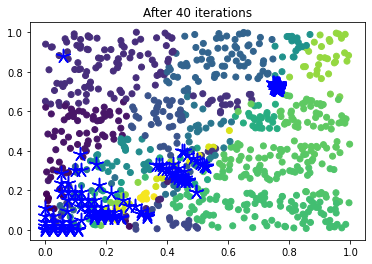

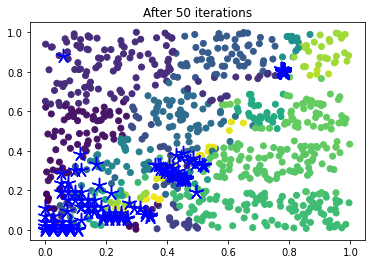

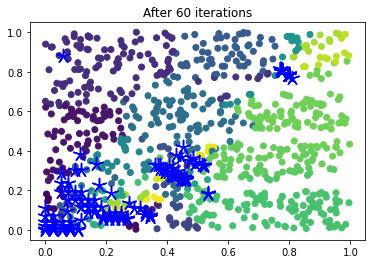

In [167]:
kmap = SOM(full_X,15,60, weights=weights)

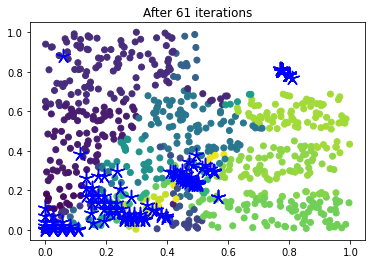

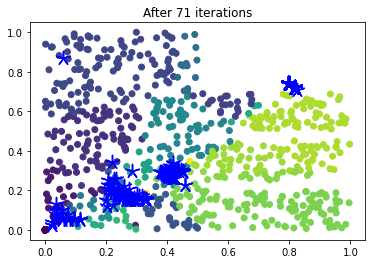

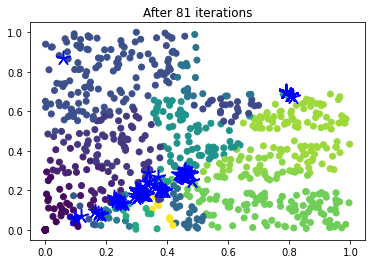

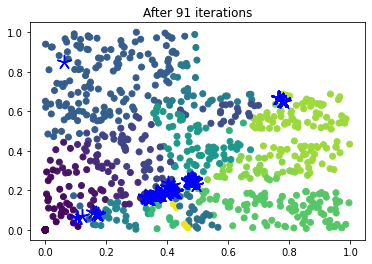

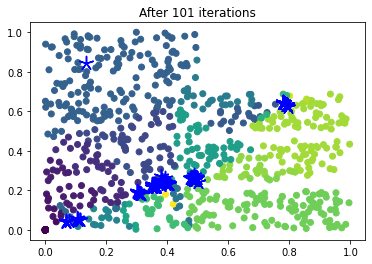

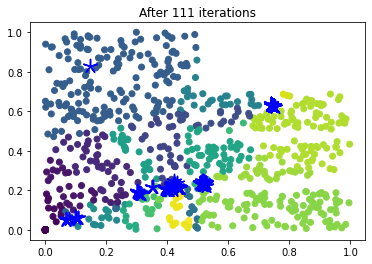

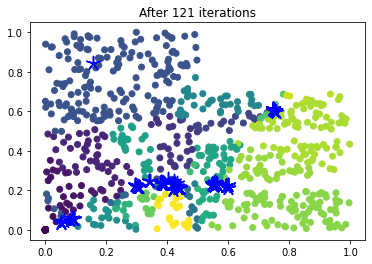

In [168]:
kmap = SOM(X=partial_X, map_size=15, iterations=60, recived_map=kmap, start_iter=61)

We can see that after removing the upper finger, the neurons are converging to the second most upper finger,
which fits our distribution.